In [1]:
import pandas as pd
import numpy as np
import re
import xgboost as xgb
import seaborn as sb
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [3]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [4]:
data_train="D:/My Personal Documents/Learnings/Data Science/Data Sets/train.csv"
data_test="D:/My Personal Documents/Learnings/Data Science/Data Sets/test.csv"
data_result="D:/My Personal Documents/Learnings/Data Science/Data Sets/gender_submission.csv"
titanic_train=pd.read_csv(data_train)
titanic_test=pd.read_csv(data_test)
titanic_result=pd.read_csv(data_result)

In [5]:
titanic_train['Source']= 'train'
titanic_test['Source']='test'

In [6]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [7]:
## Merge target variable with test data
#titanic_test=pd.merge(titanic_result,titanic_test,on='PassengerId')

### Exploratory Data Analysis

In [8]:
print(titanic_train.shape)
print(titanic_test.shape)
print(titanic_result.shape)

(891, 13)
(418, 12)
(418, 2)


In [9]:
#Combine train and test data set to cleanup and transform togather
titanic_data= pd.concat([titanic_train,titanic_test], axis=0)

C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False




In [10]:
PassengerId=titanic_test['PassengerId']

In [11]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Source         1309 non-null object
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [12]:
titanic_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Source,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,train,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,train,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,train,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,train,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,train,0.0,373450


In [13]:
titanic_data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.373176,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.795896,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


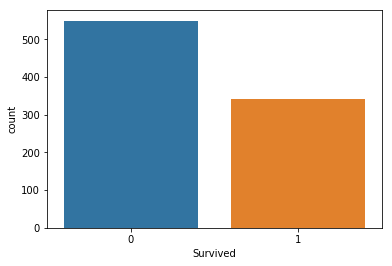

In [14]:
sb.countplot(x="Survived",data=titanic_train)

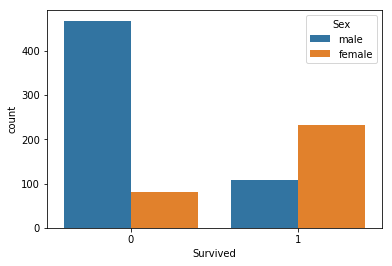

In [15]:
sb.countplot(x="Survived", hue="Sex", data=titanic_train)

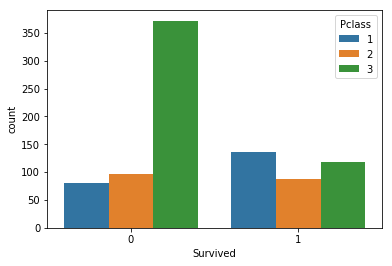

In [16]:
sb.countplot(x="Survived", hue="Pclass", data=titanic_train)

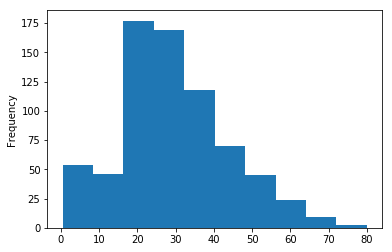

In [17]:
titanic_train["Age"].plot.hist()

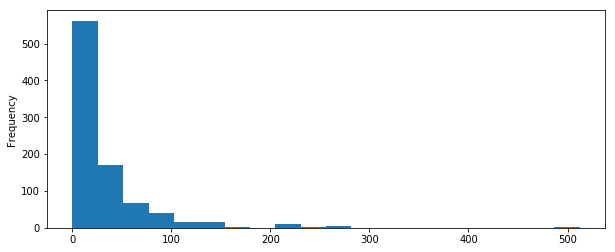

In [18]:
titanic_train["Fare"].plot.hist(bins=20, figsize=(10,4))

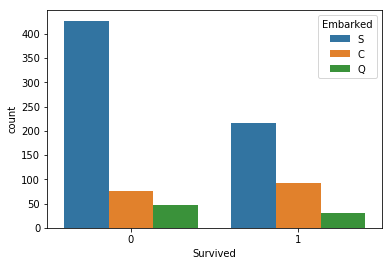

In [19]:
sb.countplot("Survived",hue="Embarked",data=titanic_train)

### Data Wrangling

In [20]:
titanic_data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Source            0
Survived        418
Ticket            0
dtype: int64

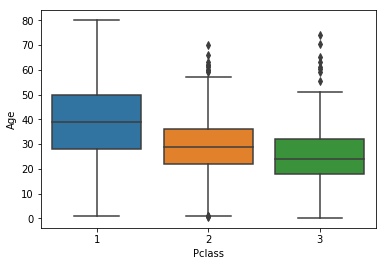

In [21]:
sb.boxplot(x="Pclass",y="Age", data=titanic_data)

In [22]:
def name_extract(word):
    return word.split(',')[1].split('.')[0].strip()

In [23]:
titanic_data['Salutation']=titanic_data['Name'].apply(name_extract)

In [24]:
titanic_data.groupby('Salutation').PassengerId.count()

Salutation
Capt              1
Col               4
Don               1
Dona              1
Dr                8
Jonkheer          1
Lady              1
Major             2
Master           61
Miss            260
Mlle              2
Mme               1
Mr              757
Mrs             197
Ms                2
Rev               8
Sir               1
the Countess      1
Name: PassengerId, dtype: int64

In [25]:
def group_salutation(Salutation):
    if(Salutation=="Mr"):
        return "Mr"
    else:
        if(Salutation=="Miss"):
            return "Miss"
        else:
            if(Salutation=="Mrs"):
                return "Mrs"
            else:
                if(Salutation=="Master"):
                    return "Master"
                else:
                    return "Others"
        

In [26]:
titanic_data.Salutation=titanic_data.Salutation.apply(group_salutation)

In [27]:
#meanAge=np.mean(titanic_data.Age)

In [28]:
#titanic_data["Age"]=titanic_data.Age.fillna(meanAge)

In [29]:
missing_ages = titanic_data[titanic_data['Age'].isnull()]
# determine mean age based on Sex and Pclass
mean_ages = titanic_data.groupby(['Sex','Pclass'])['Age'].mean()

def remove_na_ages(df):
    if pd.isnull(df['Age']):
        return mean_ages[df['Sex'],df['Pclass']]
    else:
        return df['Age']

titanic_data['Age'] =titanic_data.apply(remove_na_ages, axis=1)

In [30]:
titanic_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Source,Survived,Ticket,Salutation
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,train,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,train,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,train,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,train,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,train,0.0,373450,Mr


In [31]:
#Assign value 1 for passengers with cabin
titanic_data.loc[titanic_data['Cabin'].notnull(), 'Cabin'] = 1

In [32]:
#Assign value 0 for passengers without cabin
titanic_data.loc[titanic_data['Cabin'].isnull(), 'Cabin'] = 0

In [33]:
titanic_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Source,Survived,Ticket,Salutation
0,22.0,0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,train,0.0,A/5 21171,Mr
1,38.0,1,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,train,1.0,PC 17599,Mrs
2,26.0,0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,train,1.0,STON/O2. 3101282,Miss
3,35.0,1,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,train,1.0,113803,Mrs
4,35.0,0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,train,0.0,373450,Mr


In [34]:
titanic_data=pd.get_dummies(titanic_data, columns=['Sex','Pclass','Embarked','Salutation'])
#sex=pd.get_dummies(titanic_data["Sex"],drop_first=True)

In [35]:
titanic_data.head()

,Age,Cabin,Fare,Name,Parch,PassengerId,SibSp,Source,Survived,Ticket,...,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Salutation_Master,Salutation_Miss,Salutation_Mr,Salutation_Mrs,Salutation_Others
0,22.0,0,7.2500,"Braund, Mr. Owen Harris",0,1,1,train,0.0,A/5 21171,...,0,1,0,0,1,0,0,1,0,0
1,38.0,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,train,1.0,PC 17599,...,0,0,1,0,0,0,0,0,1,0
2,26.0,0,7.9250,"Heikkinen, Miss. Laina",0,3,0,train,1.0,STON/O2. 3101282,...,0,1,0,0,1,0,1,0,0,0
3,35.0,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,train,1.0,113803,...,0,0,0,0,1,0,0,0,1,0
4,35.0,0,8.0500,"Allen, Mr. William Henry",0,5,0,train,0.0,373450,...,0,1,0,0,1,0,0,1,0,0


def Age_trans(age):
    if(age<=5.0):
        return 'Infant'
    elif(age>5.0 and age<13.0):
        return 'Toddler'
    elif(age >=13.0 and age<18.0):
        return 'Teenage'
    elif(age >=18.0 and age<45.0):
        return 'Adult'
    else:
        return 'Old'

titanic_data['Age']=titanic_data['Age'].apply(Age_trans)

In [36]:
titanic_data.shape

(1309, 23)

In [37]:
titanic_data.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [38]:
#Split the records into train and test.
titanic_test=titanic_data[titanic_data.Source=='test']
titanic_train=titanic_data[titanic_data.Source=='train']
print(titanic_test.shape)
print(titanic_train.shape)

(418, 20)
(891, 20)


In [39]:
titanic_train=titanic_train.drop('Source',axis=1)

In [40]:
titanic_test=titanic_test.drop('Source',axis=1)

In [41]:
titanic_test=titanic_test.drop('Survived',axis=1)

In [42]:
x=titanic_train.drop(["Survived"],axis=1)


In [43]:
x.head()

,Age,Cabin,Fare,Parch,SibSp,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Salutation_Master,Salutation_Miss,Salutation_Mr,Salutation_Mrs,Salutation_Others
0,22.0,0,7.2500,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
1,38.0,1,71.2833,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
2,26.0,0,7.9250,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
3,35.0,1,53.1000,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0
4,35.0,0,8.0500,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [44]:
y=titanic_train["Survived"]

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=22)

In [46]:
decision_tree=tree.DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
y_pred=decision_tree.predict(x_test)

In [47]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [48]:
roc_auc

0.7250988142292489

In [49]:
cv=KFold(n_splits=10)
accuracies=list()
max_attributes=len(list(titanic_train))
depth_range=range(1,max_attributes+1)

In [50]:
for depth in depth_range:
    fold_accuracy=[]
    tree_model=tree.DecisionTreeClassifier(max_depth=depth)
    for train_fold,valid_fold in cv.split(titanic_train):
        f_train=titanic_train.loc[train_fold]
        f_valid=titanic_train.loc[valid_fold]
        
        model=tree_model.fit(X=f_train.drop(['Survived'],axis=1),y=f_train['Survived'])
        valid_acc=model.score(X=f_valid.drop(['Survived'],axis=1),y=f_valid['Survived'])
        fold_accuracy.append(valid_acc)
        
    avg=sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
        

In [51]:
df=pd.DataFrame({'Max Depth': depth_range,"Average Accuracy": accuracies})  
df=df[['Max Depth','Average Accuracy']]
print(df.to_string(index=False))

Max Depth  Average Accuracy
        1          0.782285
        2          0.789076
        3          0.821548
        4          0.828290
        5          0.811523
        6          0.814856
        7          0.810375
        8          0.803658
        9          0.810424
       10          0.802559
       11          0.798065
       12          0.792459
       13          0.793558
       14          0.799176
       15          0.796941
       16          0.799189
       17          0.796941
       18          0.798052
       19          0.798065


In [52]:
y_train1=titanic_train['Survived']
x_train1=titanic_train.drop('Survived',axis=1).values
x_test1=titanic_test.values

In [53]:
decision_tree=tree.DecisionTreeClassifier(max_depth=4)
decision_tree.fit(x_train1,y_train1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
type(y_train.values)

numpy.ndarray

In [55]:
y_pred=decision_tree.predict(x_test1)
submission=pd.DataFrame({"PassengerId":PassengerId, "Survived":y_pred})
submission.to_csv('submission.csv',index=False)

In [56]:
with open('tree1.dot','w') as f:
    f=tree.export_graphviz(decision_tree,
                          out_file=f,
                          max_depth=4,
                          impurity=True,
                          feature_names=list(titanic_train.drop(['Survived'],axis=1)),
                          class_names=['Died','Survived'],
                          rounded=True,
                          filled=True)

In [57]:
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

0

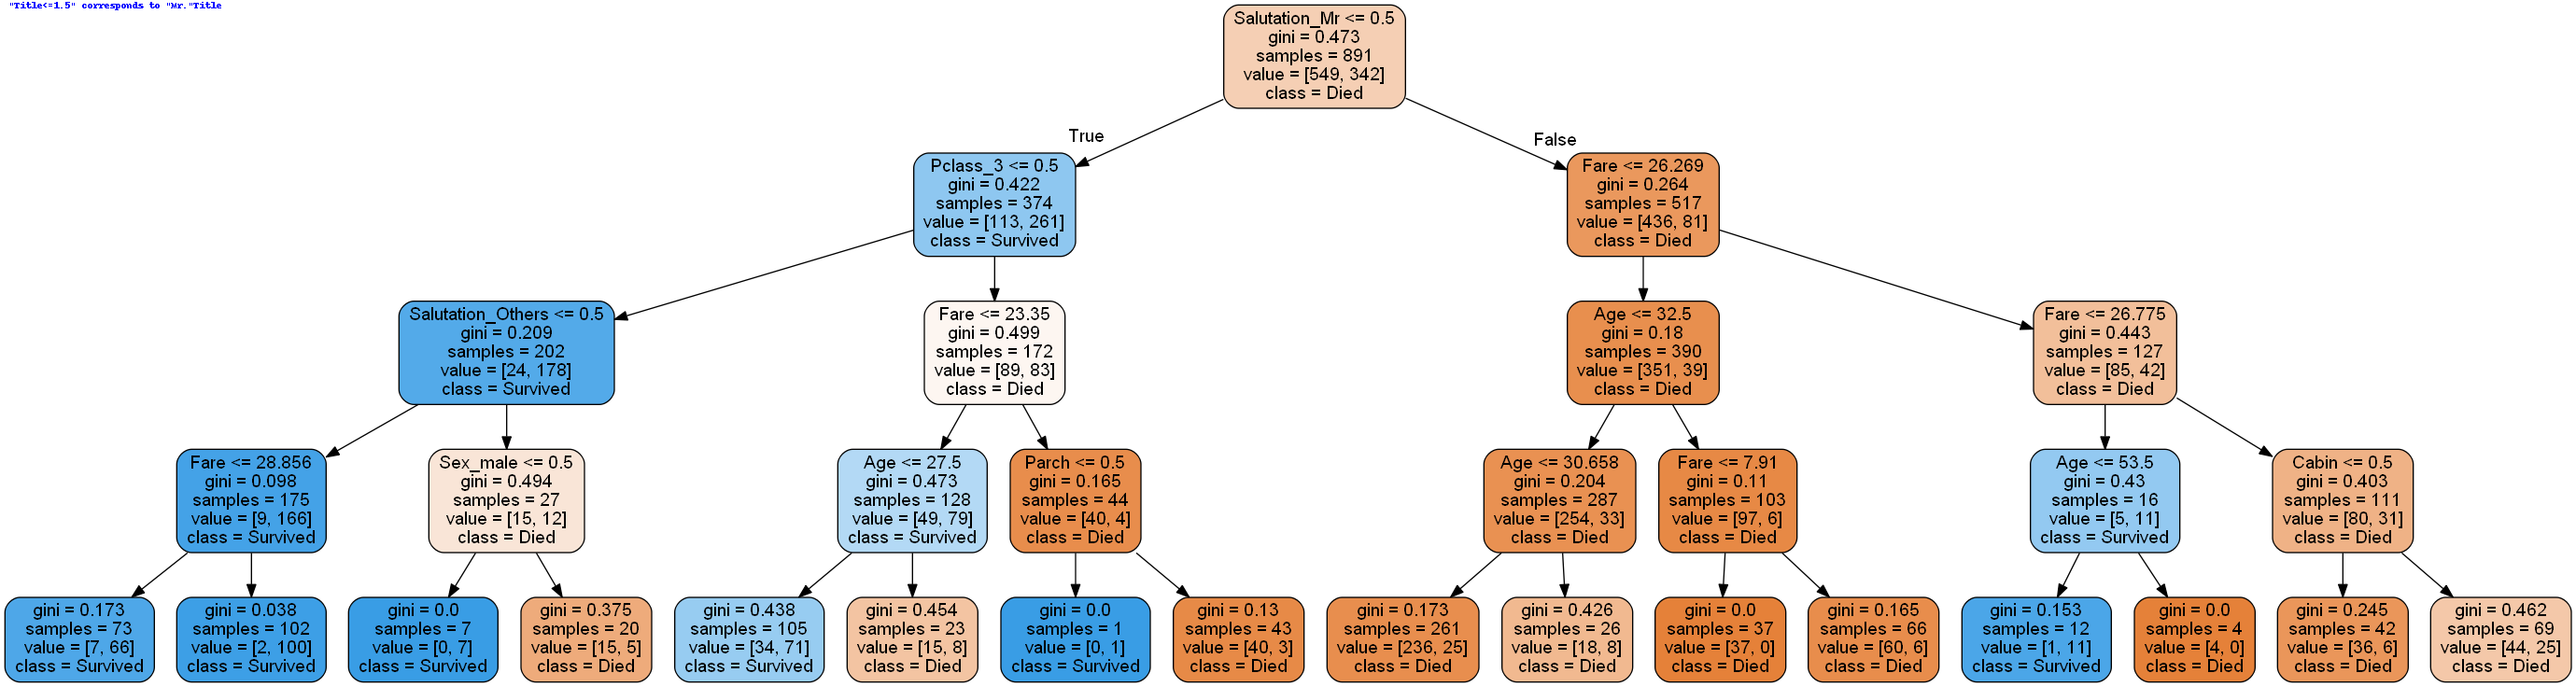

In [58]:
img=Image.open("tree1.png")
draw=ImageDraw.Draw(img)
draw.text((10,0),
         '"Title<=1.5" corresponds to "Mr."Title',
         (0,0,255)
         )
img.save('sample-out.png')
PImage("sample-out.png")

In [59]:
y_pred=decision_tree.predict(x_test)

In [60]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [74]:
roc_auc

0.7323451910408433

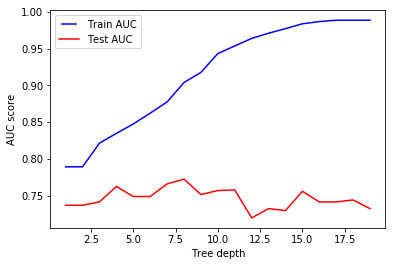

In [73]:
from sklearn.tree import DecisionTreeClassifier
max_depths = np.linspace(1, len(titanic_train.columns), len(titanic_train.columns), endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

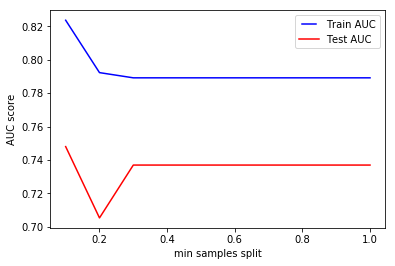

In [66]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

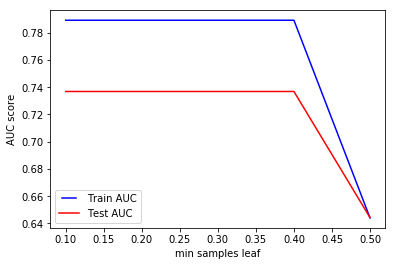

In [67]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r',label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

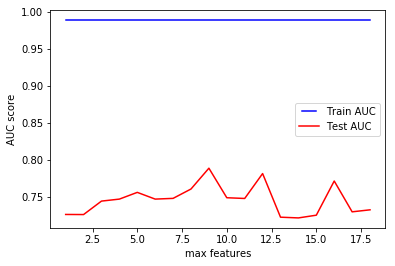

In [69]:
max_features = list(range(1,titanic_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(max_features=max_feature)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()